In [81]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [82]:
# Configure the color

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
sns.set_theme()

In [83]:
# Helper function
def get_clantats_by_mode(mode_id: int, players: DataFrame, to_insert: DataFrame):
    for clantag in players.keys():
        temp = {'clantag': clantag, 'total_battles': players[clantag][f'battles_in_{mode_id}'].sum(), 'players': len(players[clantag].index)}
        temp['average_battles'] = temp['total_battles'] / temp['players']
        to_insert = to_insert.append(temp, ignore_index=True)
    return to_insert

In [84]:
data = pd.read_csv('csvs/aw_players.csv')

In [85]:
# Base dataframe
dataframe = DataFrame(data, columns=['nickname', 'battles_in_0','spotting_in_0', 'kills_in_0', 'dmg_in_0', 'winrate_in_0', 'battles_in_1','dmg_in_1','winrate_in_1', 'clantag', 'spotting_in_1', 'kills_in_1','is_stats_closed'])

### Данные о датасете

In [86]:
dataframe.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,9156.000000,9157.000000,9157.000000,9156.000000,9156.000000,9167.000000,9167.000000,9167.000000,9167.000000,9167.000000
mean,3789.447794,414.575086,0.801873,1722.934239,48.583639,2400.239228,10376.260681,76.069728,2361.219090,5.990509
std,5916.164708,190.078481,0.506702,1115.312945,12.989596,3896.833680,5852.509055,17.759428,1233.845495,2.144585
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,296.312500,0.450000,898.162500,46.400000,121.000000,5809.025000,71.400000,1509.768509,4.880000
50%,1216.000000,402.605932,0.760000,1523.380000,50.000000,798.000000,10333.290000,79.100000,2360.048708,6.240000
75%,4986.250000,531.415353,1.080000,2384.575000,53.200000,2941.000000,14721.175000,85.300000,3136.218592,7.380000
max,51345.000000,1555.478197,6.000000,9221.800000,100.000000,44838.000000,38845.020000,100.000000,9820.000000,17.000000


### Топ игроков по количеству боёв

In [87]:
dataframe.sort_values('battles_in_1', ascending=False).head(10)[['clantag', 'nickname', 'battles_in_1', 'dmg_in_1', 'winrate_in_1', 'kills_in_1']]

,clantag,nickname,battles_in_1,dmg_in_1,winrate_in_1,kills_in_1
5364,H0TS,katzz,44838.0,19083.54,94.0,8.68
5746,Араб,m920,39370.0,13458.17,91.8,6.16
8546,FORC1,Штормсс260р,35732.0,14956.39,82.3,6.39
2753,RusTD,boroda71,34922.0,12454.25,85.9,5.73
5643,ВекХХ,oSTALKERo,34616.0,17179.19,88.0,8.63
8852,1PZBH,jonn,34573.0,9705.85,86.2,6.28
5016,Goal,Lisovski2015,33505.0,12402.36,93.9,7.50
5240,Brats,JACK-POT,31259.0,17196.70,97.2,10.48
5038,Noble,D1K1Y,30940.0,21911.79,96.8,9.24
5315,СпНаз,Угрюмый13,29912.0,12275.12,89.2,7.73


In [88]:
clantags = dataframe.clantag.unique()
players = {}

In [89]:
for clantag in clantags:
    players[clantag] = dataframe.loc[dataframe['clantag'] == clantag]

In [90]:
clans_stats = pd.DataFrame(columns=['clantag', 'total_battles', 'players', 'average_battles'])

In [91]:
clans_stats = get_clantats_by_mode(1, players, clans_stats)

<ipython-input-83-db4ced57e9f3>:5: RuntimeWarning: invalid value encountered in double_scalars
  temp['average_battles'] = temp['total_battles'] / temp['players']


In [92]:
clans_stats.describe()

,total_battles,average_battles
count,940.000000,939.000000
mean,21234.848936,3126.915940
std,49041.924725,3527.550480
min,0.000000,0.000000
25%,1109.250000,653.000000
50%,4846.000000,1986.750000
75%,13883.500000,4420.861111
max,485780.000000,34573.000000


In [93]:
sorted_df_avg = clans_stats.sort_values('average_battles', ascending=False)
sorted_df_avg_fitred_more_15_players = sorted_df_avg.loc[sorted_df_avg['players'] >= 15]

### Топ кланов по среднему количеству боёв в PvE

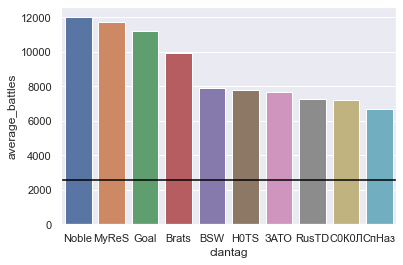

In [94]:
sorted_df_avg_fitred_more_15_players_top_10_players = sorted_df_avg_fitred_more_15_players.head(10)

top_clans_ = sns.barplot(x=sorted_df_avg_fitred_more_15_players_top_10_players['clantag'], y=sorted_df_avg_fitred_more_15_players_top_10_players['average_battles'], label='Average PvE battles per clan' )
hor_line = top_clans_.axhline(y=sorted_df_avg_fitred_more_15_players['average_battles'].mean(), c='black', animated=True)
hor_line.set_label('Average value for dataset')

In [95]:
filtred = dataframe.loc[(dataframe['battles_in_0'] > 100) & (dataframe['battles_in_1'] > 100)]

### Корреляция урона в PvP от урона в PvE

Text(0, 0.5, 'Damage in PvP')

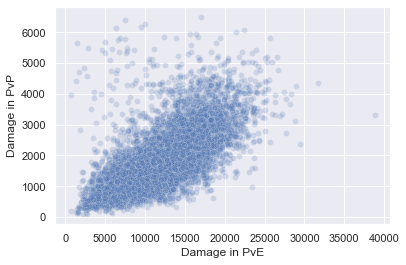

In [96]:
damage_plot = sns.scatterplot(x=filtred['dmg_in_1'], y=filtred['dmg_in_0'], alpha=0.2)
damage_plot.set_xlabel('Damage in PvE')
damage_plot.set_ylabel('Damage in PvP')


#### Градиентный график

Text(0, 0.5, 'Damage in PvP')

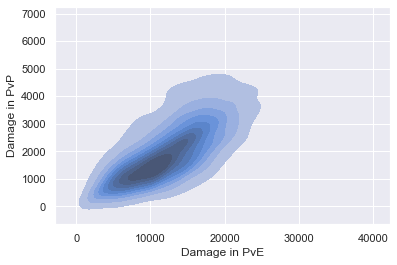

In [97]:
dmg = sns.kdeplot(x=filtred['dmg_in_1'], y=filtred['dmg_in_0'], fill=True, common_grid=True)
dmg.set_xlabel('Damage in PvE')
dmg.set_ylabel('Damage in PvP')

#### Регрессионная линия 

Text(0, 0.5, 'Damage in PvP')

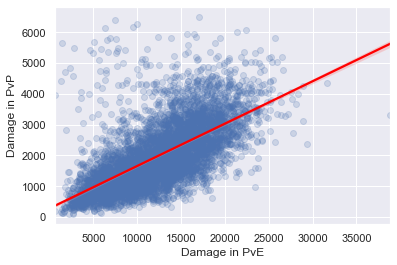

In [98]:
reg = sns.regplot(x=filtred['dmg_in_1'], y=filtred['dmg_in_0'],scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
reg.set_xlabel('Damage in PvE')
reg.set_ylabel('Damage in PvP')

### Корреляция винрейта в PvP от винрейта в PvE

Text(0, 0.5, 'Winrate in PvP')

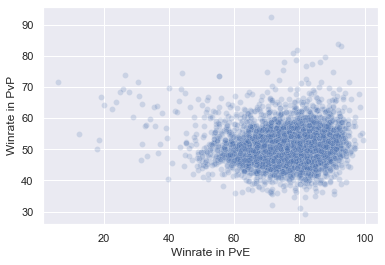

In [99]:
winrate_plot = sns.scatterplot(data=filtred, x='winrate_in_1', y='winrate_in_0',  alpha=0.2)
winrate_plot.set_xlabel('Winrate in PvE')
winrate_plot.set_ylabel('Winrate in PvP')

#### Градиентный график

Text(0, 0.5, 'Winrate in PvP')

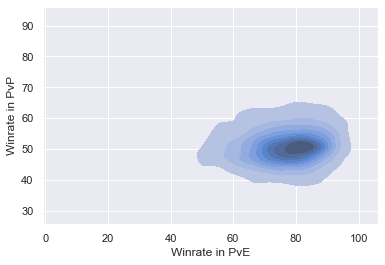

In [100]:
wr = sns.kdeplot(x=filtred['winrate_in_1'], y=filtred['winrate_in_0'], fill=True, common_grid=True)
wr.set_xlabel('Winrate in PvE')
wr.set_ylabel('Winrate in PvP')

In [101]:
filtred.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000
mean,5187.808337,467.694334,0.882239,1981.379228,50.780535,3201.972928,12346.367927,76.814317,2772.851415,6.564959
std,6479.357645,158.542580,0.437308,1045.446114,5.082035,4238.359054,4915.280038,9.609536,1009.746444,1.627454
min,101.000000,19.670846,0.040000,82.560000,29.100000,101.000000,645.220000,6.100000,158.399552,0.340000
25%,770.000000,350.245430,0.550000,1183.570000,47.600000,536.000000,8608.950000,71.500000,2063.471037,5.530000
50%,2670.000000,448.345023,0.850000,1797.710000,50.400000,1552.000000,12327.170000,78.000000,2692.367665,6.610000
75%,7111.000000,565.296955,1.140000,2616.290000,53.200000,4156.000000,15811.150000,83.500000,3362.825473,7.620000
max,51345.000000,1555.478197,4.460000,6506.210000,92.500000,44838.000000,38845.020000,99.400000,8577.955142,15.670000


### Гистограмма винрейта в PvE( учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP)

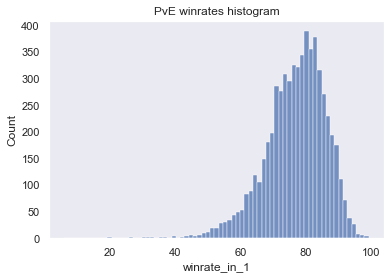

In [102]:
wr_pve_hist = sns.histplot(data=filtred, x='winrate_in_1')
wr_pve_hist.set_title('PvE winrates histogram')
wr_pve_hist.grid(False)

### Гистограмма боёв в PvE( учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP

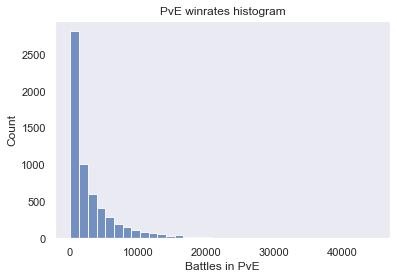

In [103]:
battles_pve_hist = sns.histplot(data=filtred, x='battles_in_1', bins=35)
battles_pve_hist.set_title('PvE winrates histogram')
battles_pve_hist.set_xlabel('Battles in PvE')
battles_pve_hist.grid(False)

### Корреляция винрейта от количества боёв

Text(0, 0.5, 'Winrate in PvE')

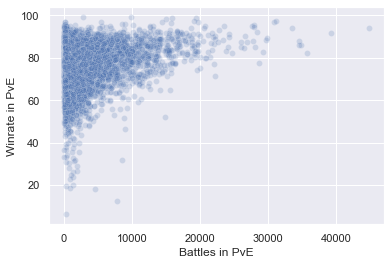

In [104]:
winrate_to_battles_plot = sns.scatterplot(data=filtred, x='battles_in_1', y='winrate_in_1', alpha=0.2)
winrate_to_battles_plot.set_xlabel('Battles in PvE')
winrate_to_battles_plot.set_ylabel('Winrate in PvE')

Text(0, 0.5, 'Damage in PvE')

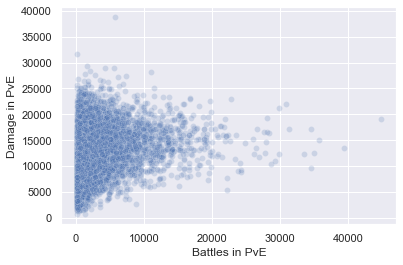

In [105]:
damage_to_battles_pve = sns.scatterplot(data=filtred, x='battles_in_1', y='dmg_in_1', alpha=0.2)
damage_to_battles_pve.set_xlabel('Battles in PvE')
damage_to_battles_pve.set_ylabel('Damage in PvE')

Text(0, 0.5, 'Average kills in PvE')

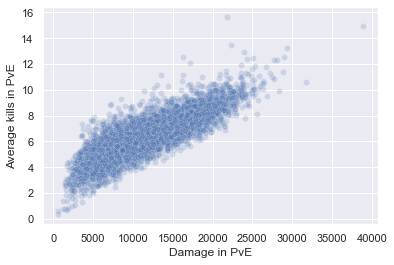

In [106]:
damage_to_kills = sns.scatterplot(data=filtred, x='dmg_in_1', y='kills_in_1', alpha=0.2)
damage_to_kills.set_xlabel('Damage in PvE')
damage_to_kills.set_ylabel('Average kills in PvE')